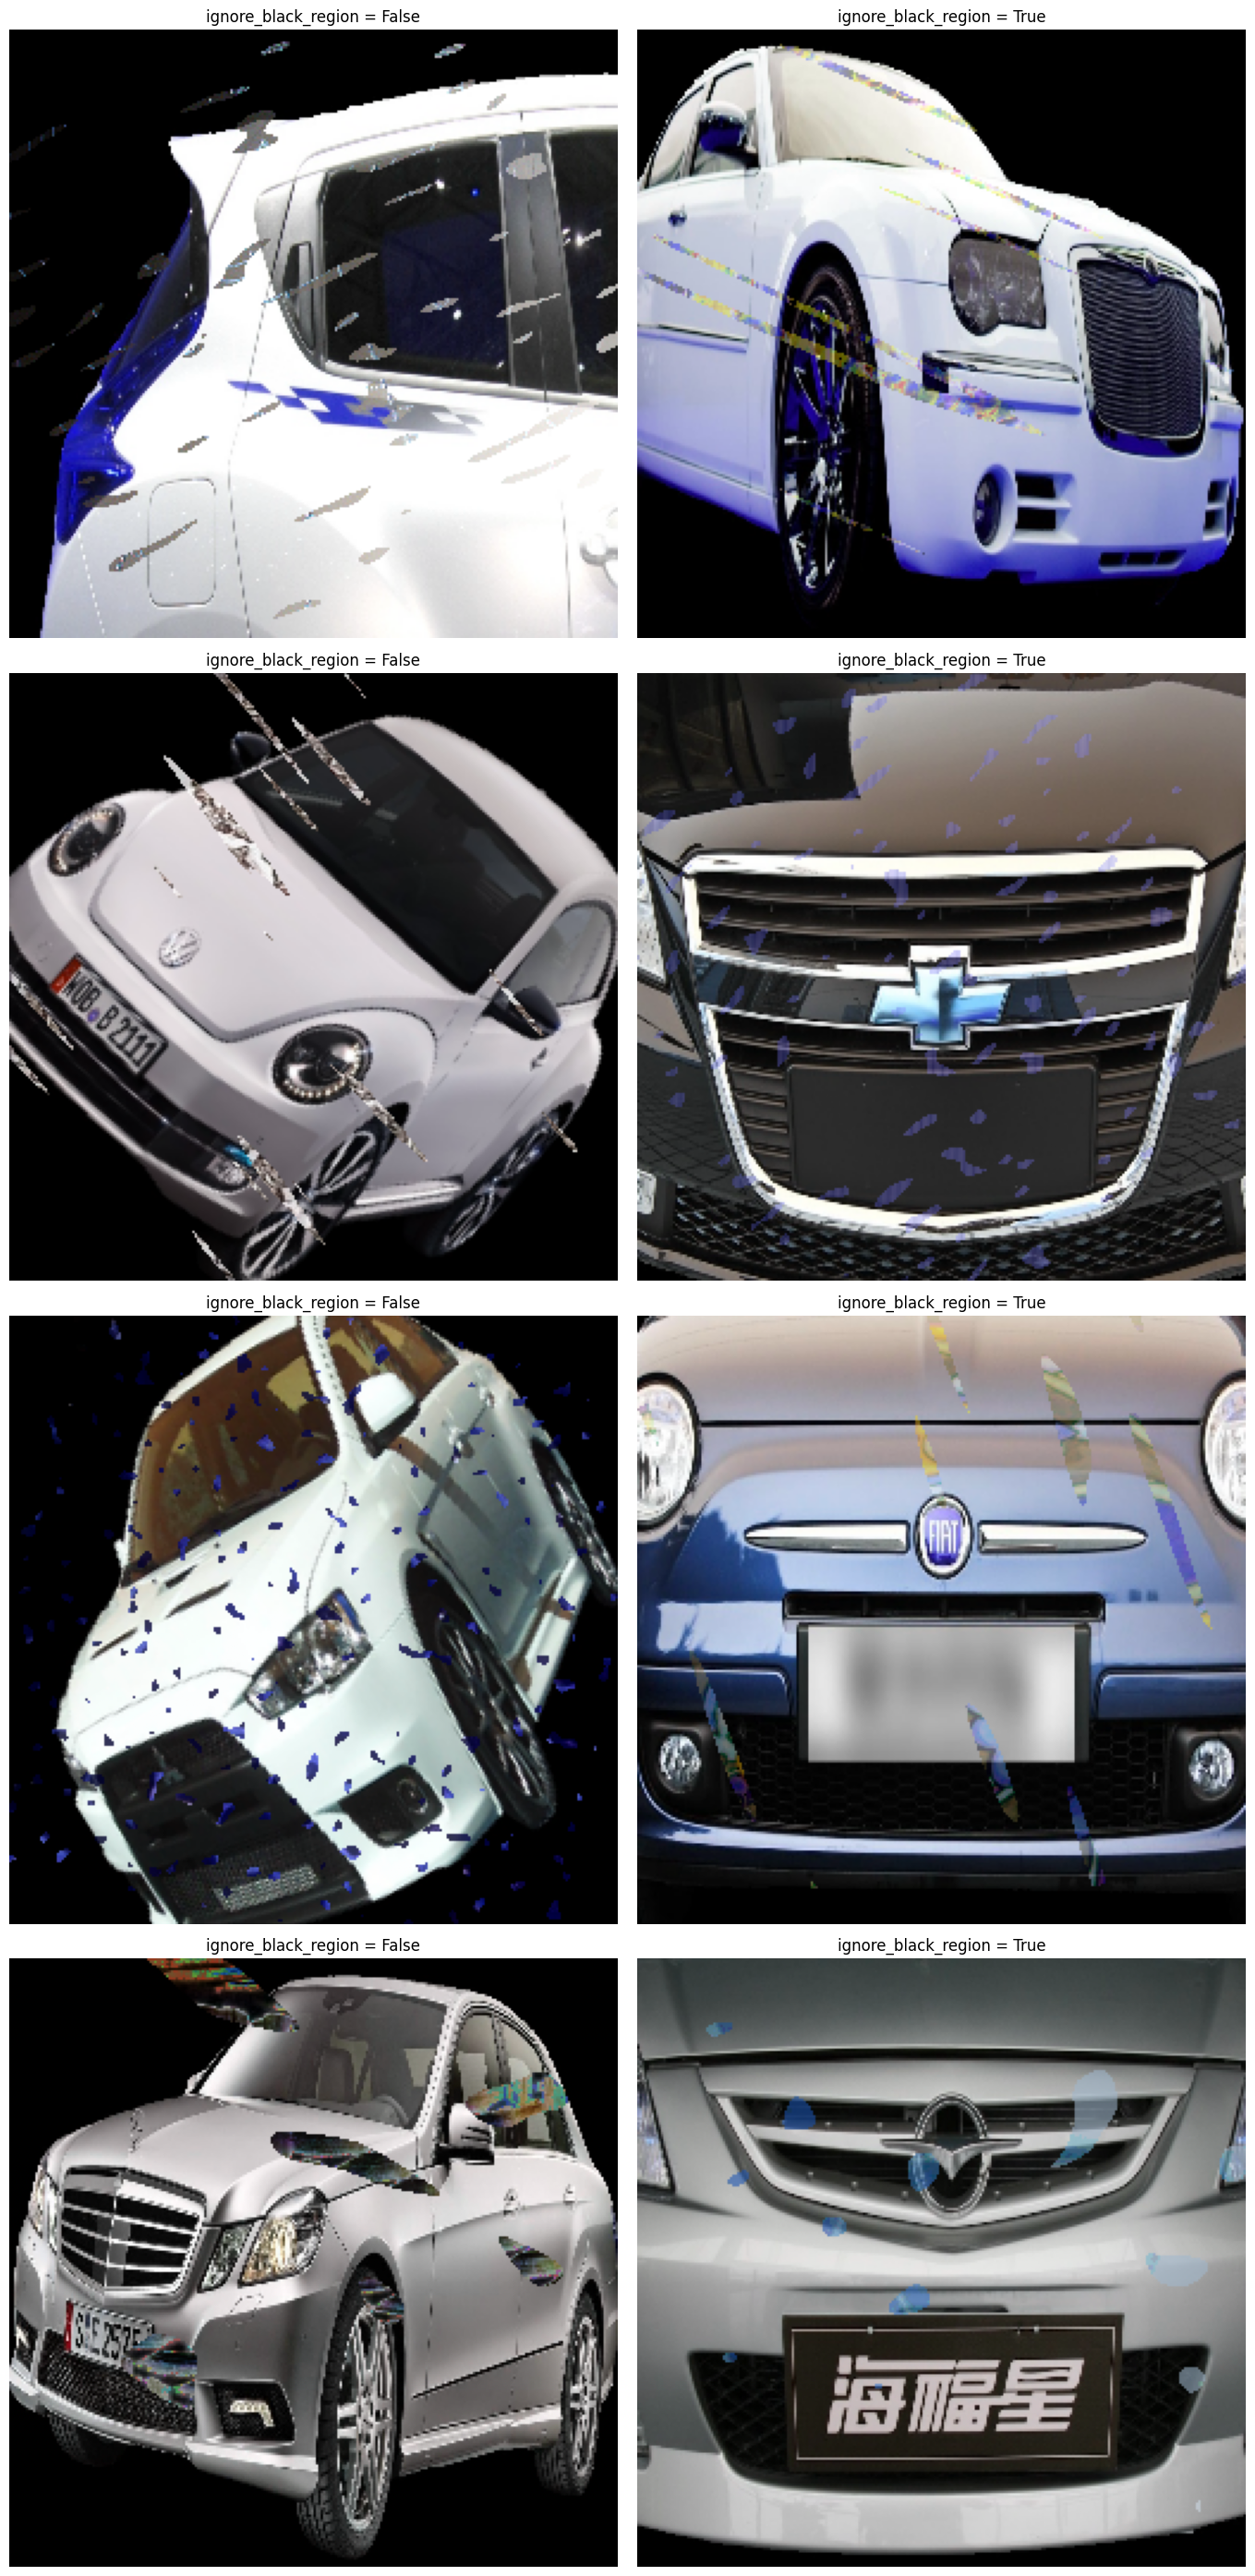

In [2]:
from dataloader.data_loader import MVTecDRAEMTrainDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

root = f'{os.getcwd()}/dataset/cars/train/good/'
dtd = f'{os.getcwd()}/dtd/images'

dataset_false = MVTecDRAEMTrainDataset(
    root, dtd, resize_shape=[256, 256], ignore_black_region=False
)

dataset_true = MVTecDRAEMTrainDataset(
    root, dtd, resize_shape=[256, 256], ignore_black_region=True
)

loader_false = DataLoader(dataset_false, batch_size=8, shuffle=True, num_workers=0)
loader_true  = DataLoader(dataset_true,  batch_size=8, shuffle=True, num_workers=0)

_, batch_false = next(enumerate(loader_false))
_, batch_true  = next(enumerate(loader_true))

imgs_false = batch_false['augmented_image']
imgs_true  = batch_true['augmented_image']
has_anomaly = batch_false['has_anomaly']

pairs = []
for i, anom in enumerate(has_anomaly):
    if anom:
        pairs.append((imgs_false[i], imgs_true[i]))
    if len(pairs) == 4:
        break

fig, axes = plt.subplots(len(pairs), 2, figsize=(14, 28))

for i, (img_f, img_t) in enumerate(pairs):
    axes[i, 0].imshow(np.transpose(img_f, (1, 2, 0)))
    axes[i, 0].set_title("ignore_black_region = False")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(np.transpose(img_t, (1, 2, 0)))
    axes[i, 1].set_title("ignore_black_region = True")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()
